In [31]:

import os
import glm_func 
from nilearn.image import mean_img
from nilearn import plotting
import glob as glob
from nilearn.plotting import plot_img, plot_epi, plot_roi, plot_stat_map
from nilearn import image
import importlib
import nibabel as nib   
import numpy as np
#importlib.reload(func)


In [62]:
import nilearn

print("Nilearn version:", nilearn.__version__)

Nilearn version: 0.10.2


In [32]:
pwd = r'/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis/debug/'
os.chdir(pwd)
func_asl_path = r'/home/dsutterlin/projects/test_data/ASL_RS_hypnosis/CBF_4D_normalized/'
img = nib.load('all_cond_mean_img.nii.gz')
print(img.shape)
ts = nib.load('/home/dsutterlin/projects/test_data/ASL_RS_hypnosis/CBF_4D_normalized/APM_15_H2/wcbf_0_srASL_4D_during_4D.nii')
print(ts.shape)
!ls 

(91, 109, 91)
(91, 109, 91, 60)
1-voxelmask.nii.gz	  masked-masker_asl_report.html  pre_data.pkl
all_cond_mean_img.nii.gz  masked-view_asl_plot.html	 report.html
atlas.nii.gz		  masker_asl_report.html	 reports
BG-voxelmask.nii.gz	  masker_report.html		 test.html
difumo64_correlation	  maskerreport.html		 view_asl_plot.html
EPI-voxelmask.nii.gz	  mean_img.html			 view_image_plot.html
fitted_timeSeries.pkl	  nilearn_cache			 WB-voxelmask.nii.gz
labels.pkl		  post_data.pkl


# Voxel masker (whole brain)

### Desmarteaux data

In [5]:
import glob
import nibabel as nib
func_path = '/home/dsutterlin/projects/test_data/desmarteauxSugg/APM_26_H1'
file_list = glob.glob(os.path.join(func_path, 'swaf*.nii'))
file_list.sort()

func = nib.concat_images(file_list)
print(func.shape)

(91, 109, 91, 377)


(91, 109, 91)


/home/dsutterlin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


NameError: name 'NiftiMasker' is not defined

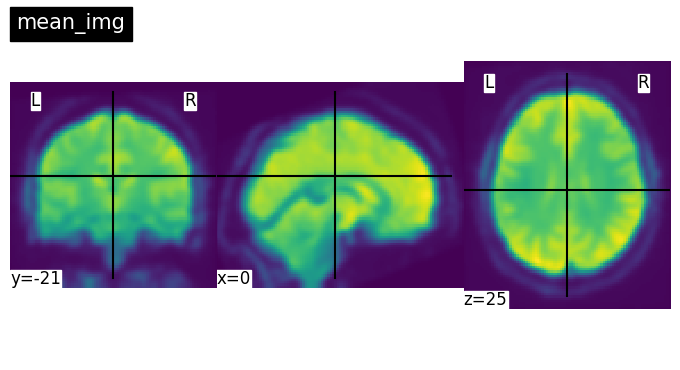

In [6]:
from nilearn import image
#func = nib.load(func_path)
mean_img = image.mean_img(func)
print(mean_img.shape)
plotting.view_img(mean_img, bg_img='MNI152', title='mean img with MNI BG').save_as_html('mean_img.html')
plotting.plot_img(mean_img, title = 'mean_img',)

voxel_masker = NiftiMasker(
    mask_strategy = 'whole-brain-template',
    smoothing_fwhm = 6,
    verbose=5,
)
voxel_masker.fit(func_asl)
voxel_masker.generate_report().save_as_html('masker_report.html')
plotting.plot_roi(voxel_masker.mask_img_, title='Mask')
plotting.plot_img(image.math_img("img1 * img2", img1=mean_img, img2=voxel_masker.mask_img_), title='Mean Image with Voxel Mask')
plotting.view_img(image.math_img("img1 * img2", img1=mean_img, img2=voxel_masker.mask_img_), title='Mean Image with Voxel Mask').save_as_html('view_image_plot.html')



### ASL data


(91, 109, 91)


/home/dsutterlin/.local/lib/python3.10/site-packages/nilearn/plotting/html_stat_map.py:198: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(stat_map_img, ensure_finite=True)
/home/dsutterlin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


[NiftiMasker.fit] Loading data from Nifti1Image('/home/dsutterlin/projects/test_data/ASL_RS_hypnosis/CBF_4D_normalized/APM_15_H2/wcbf_0_srASL_4D_during_4D.nii')
[NiftiMasker.fit] Computing the mask
Template whole-brain mask computation
[NiftiMasker.fit] Resampling mask
[NiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/dsutterlin/projects/test_data/ASL_RS_hypnosis/CBF_4D_normalized/APM_15_H2/wcbf_0_srASL_4D_during_4D.nii')
[NiftiMasker.transform_single_imgs] Smoothing images
[NiftiMasker.transform_single_imgs] Extracting region signals
[NiftiMasker.transform_single_imgs] Cleaning extracted signals


/home/dsutterlin/.local/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:232: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(img, ensure_finite=True)
/home/dsutterlin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


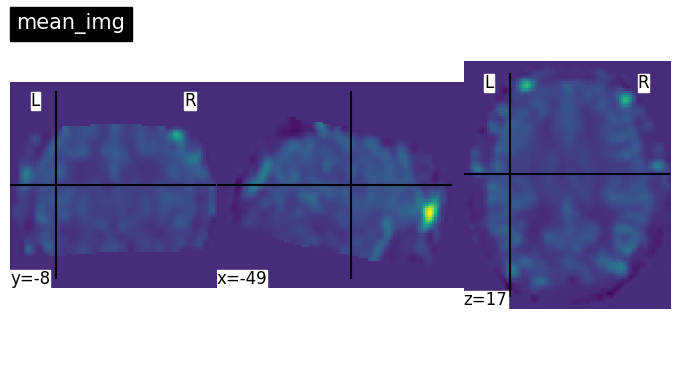

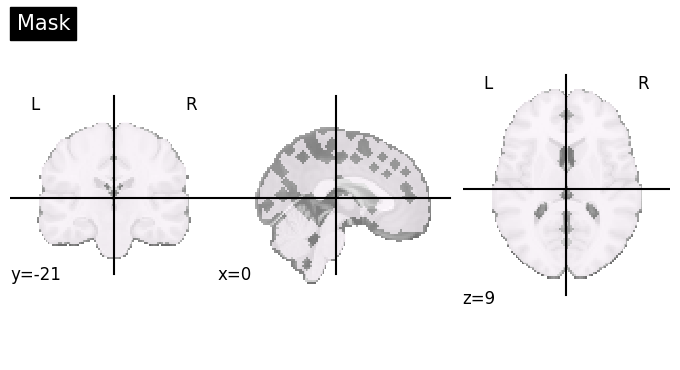

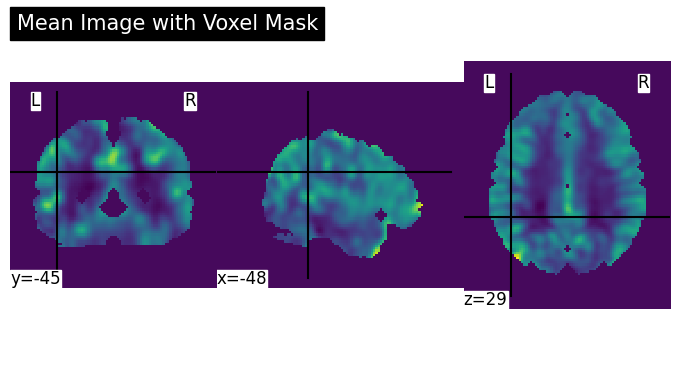

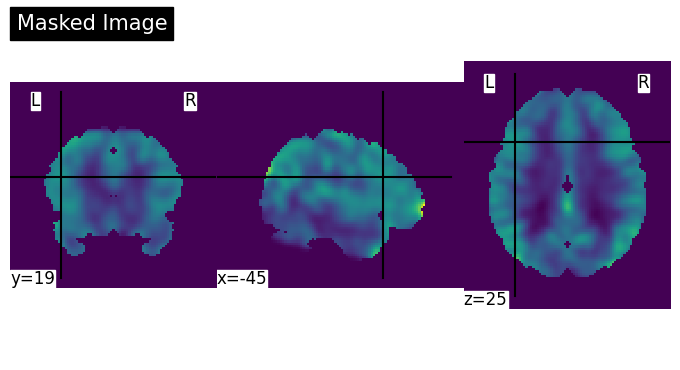

In [37]:
from nilearn import image
from nilearn.maskers import NiftiMasker
func_asl = nib.load(os.path.join(func_asl_path,'APM_15_H2/wcbf_0_srASL_4D_during_4D.nii'))
mean_img_asl = image.mean_img(func_asl)
print(mean_img_asl.shape)
plotting.view_img(mean_img_asl, bg_img='MNI152', title='mean img with MNI BG').save_as_html('mean_img.html')
plotting.plot_img(mean_img_asl, title = 'mean_img',)

voxel_masker = NiftiMasker(
    mask_strategy = 'whole-brain-template',
    smoothing_fwhm = 6,
    verbose=5,
)
voxel_masker.fit(func_asl) 
ts = voxel_masker.transform(func_asl)
masked_img = voxel_masker.inverse_transform(ts) 
voxel_masker.generate_report().save_as_html('masker_asl_report.html')
plotting.plot_roi(voxel_masker.mask_img_, title='Mask')
plotting.plot_img(image.math_img("img1 * img2", img1=mean_img_asl, img2=voxel_masker.mask_img_), title='Mean Image with Voxel Mask')
plotting.view_img(image.math_img("img1 * img2", img1=mean_img_asl, img2=voxel_masker.mask_img_), title='Mean Image with Voxel Mask').save_as_html('view_asl_plot.html')
plotting.plot_img(mean_img(masked_img), title = 'Masked Image')


##### MNI152 binary mask

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]


/home/dsutterlin/.local/lib/python3.10/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(
/home/dsutterlin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


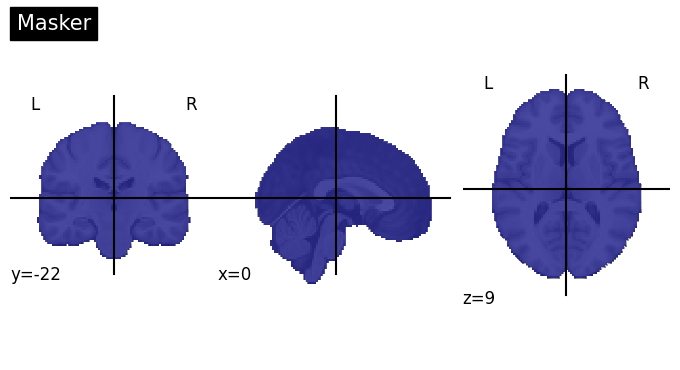

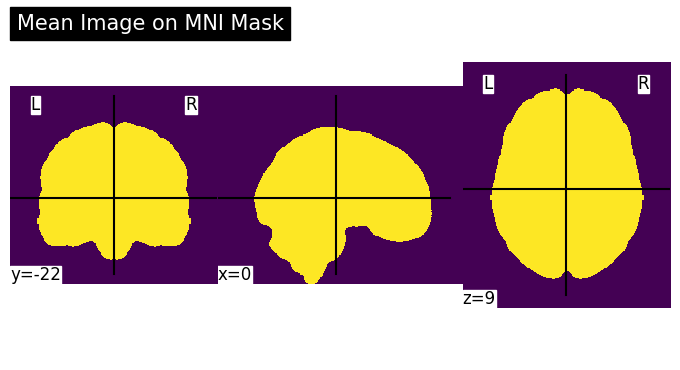

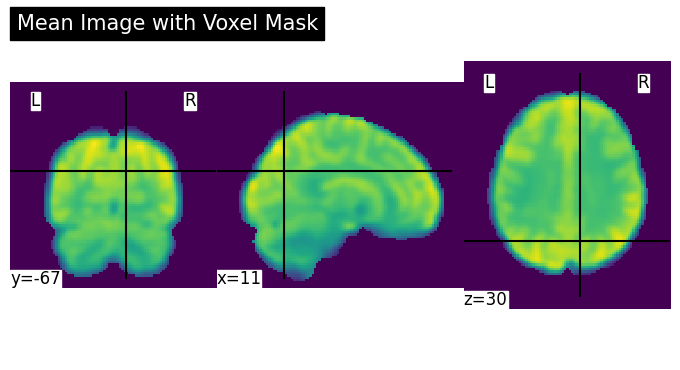

In [35]:
from nilearn.datasets import load_mni152_template, load_mni152_gm_template
from nilearn.image import math_img, resample_to_img
from nilearn import image
from nilearn.maskers import  NiftiMasker
from nilearn.plotting import plot_roi, plot_img

# Import MNI template
mni_template = load_mni152_template()

# Binarize MNI template
bin_mni_mask = math_img("img > 0", img=mni_template)
print(mean_img.affine)
# Resample bin_mni_mask to mean_img affine
resampled_bin_mni_mask = resample_to_img(bin_mni_mask, mean_img)

# Initialize NiftiMasker with mask_img as the resampled binarized mask
masker = NiftiMasker(mask_img=resampled_bin_mni_mask, mask_strategy='whole-brain-template', smoothing_fwhm=6)
masker.fit(func)


In [93]:

from nilearn import image
import numpy as np
import numpy as np

# Assuming func_asl is your 4D image
print(func_asl.shape)

# Convert 4D image to a NumPy array
asl_data = func_asl.get_fdata()
print(asl_data.shape)
# Specify the indices of volumes to be removed (e.g., remove volume 9)
new_labels = [lab for i, lab in enumerate(labels) if i not in [0,3,5]]
print(labels, new_labels) 


(91, 109, 91, 60)
(91, 109, 91, 60)
0               Superior frontal sulcus
1                        Fusiform gyrus
2            Calcarine cortex posterior
3            Cingulate cortex posterior
4     Parieto-occipital sulcus superior
                    ...                
59                               Cuneus
60                Middle temporal gyrus
61               Superior frontal gyrus
62                       Central sulcus
63                              Caudate
Name: Difumo_names, Length: 64, dtype: object ['Fusiform gyrus', 'Calcarine cortex posterior', 'Parieto-occipital sulcus superior', 'Superior temporal sulcus with angular gyrus', 'Planum temporale', 'Cerebellum Crus II', 'Superior parts of Postcentral and Precentral gyri', 'Transverse sinus', 'Paracentral gyrus RH', 'Superior occipital gyrus', 'Cingulate gyrus mid-posterior', 'ventricles', 'Fusiform gyrus posterior', 'Superior frontal gyrus medial', 'Precuneus superior', 'Planum polare', 'Parieto-occipital sulcus middl

# Maps masker

(91, 109, 91)
(104, 123, 104, 64)


/home/dsutterlin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


[NiftiMapsMasker.fit] loading regions from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
[NiftiMapsMasker.fit] loading mask from Nifti1Image(
shape=(91, 109, 91),
affine=array([[  -2.,    0.,    0.,   90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling mask


/home/dsutterlin/.local/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:232: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  data = safe_get_data(img, ensure_finite=True)
/home/dsutterlin/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


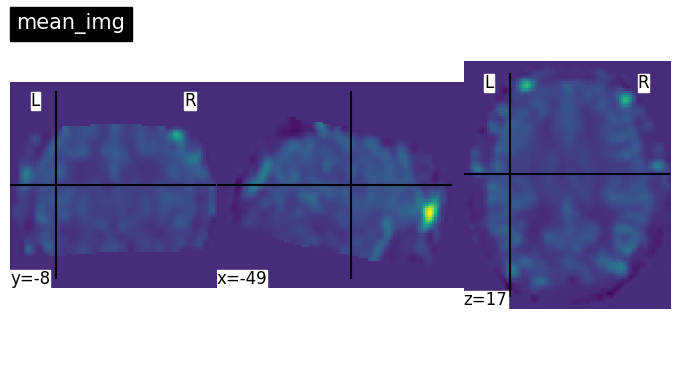

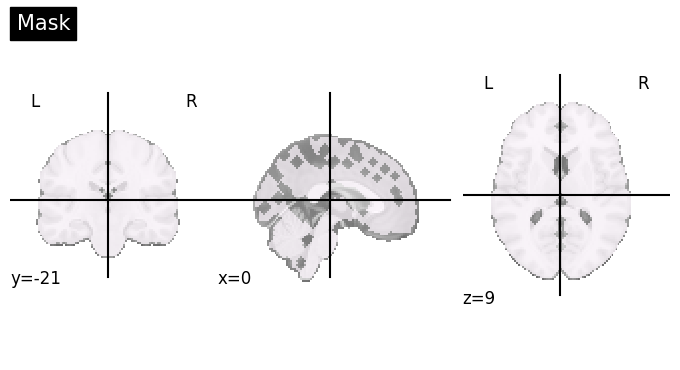

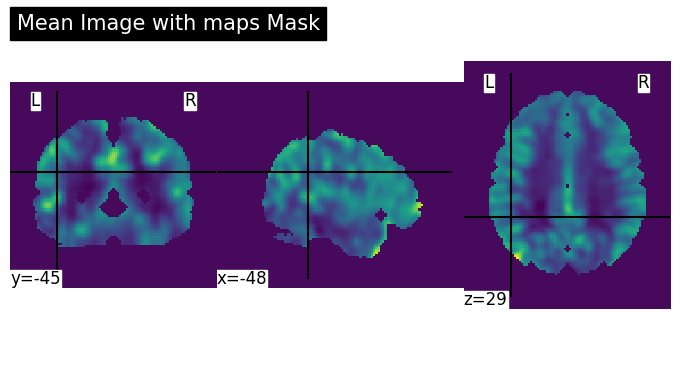

In [13]:
from nilearn import image
from nilearn.input_data import NiftiMapsMasker
from nilearn import plotting

atlas_path = '/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis/atlases/atlas_difumo64/64difumo2mm_maps.nii.gz'

# Load the functional image
func_asl = nib.load(os.path.join(func_asl_path, 'APM_15_H2/wcbf_0_srASL_4D_during_4D.nii'))

print(mean_img_asl.shape)
print(nib.load(atlas_path).shape)
# View the mean image with MNI background
plotting.view_img(mean_img_asl, bg_img='MNI152', title='mean img with MNI BG').save_as_html('mean_img.html')
plotting.plot_img(mean_img_asl, title='mean_img')

# Define the NiftiMapsMasker
mapsmasker = NiftiMapsMasker(maps_img=atlas_path,mask_img=voxel_masker.mask_img_, smoothing_fwhm=6, verbose=5, resampling_target = 'data')

# Fit the masker to the functional image
mapsmasker.fit(func_asl)

# Generate the masker report and save it as HTML
mapsmasker.generate_report(displayed_maps=64).save_as_html('masked-masker_asl_report.html')

# Plot the mask
plotting.plot_roi(mapsmasker.mask_img_, title='Mask')

# Compute the mean image with the voxel mask
mean_img_masked = image.math_img("img1 * img2", img1=mean_img_asl, img2=voxel_masker.mask_img_)

# Plot the mean image with the voxel mask
plotting.plot_img(mean_img_masked, title='Mean Image with maps Mask')

# View the mean image with the voxel mask and save it as HTML
plotting.view_img(mean_img_masked, title='Mean Image with maps Mask').save_as_html('masked-view_asl_plot.html')


In [11]:
 #all_mean_img = image.mean_img(pre_data + post_data)
        #voxel_masker.fit(image.concat_imgs(pre_data+post_data))
        #niftimask = voxel_masker.mask_img_
        #nib.save(niftimask, os.path.join(pwd_main, 'debug', 'BG-voxelmask.nii.gz'))
        #plotting.plot_roi(niftimask, title='Whole brain voxel mask')
        #plotting.plot_stat_map(voxel_masker.mask_img_)
        #voxel_masker_report = voxel_masker.generate_report()
        #voxel_masker_report.save_as_html(os.path.join(pwd_main, 'debug', 'reports', 'voxel_masker_report.html'))
        
        print('---MAKING MASKER REPORTS---')
        print('---Voxel masker---')
        print('---Atlas and maps masker---')
        masker_report = masker.generate_report()
        masker_report.save_as_html(os.path.join(pwd_main, 'debug','reports','masker_report.html'))
        nib.save(atlas, os.path.join(pwd_main, 'debug', 'atlas.nii.gz'))
        resamp_mask = image.resample_img(masker.mask_img_, all_mean_img) #(img to resamp, target)
        nib.save(resamp_mask, os.path.join(pwd_main, 'debug', 'resampled_masker.nii.gz'))
        nib.save(masker.mask_img_, os.path.join(pwd_main, 'debug', 'masker.nii.gz'))
        nib.save(masker.mask_img_, os.path.join(pwd_main, 'debug','resampled_masker.nii.gz'))
        nib.save(all_mean_img, os.path.join(pwd_main, 'debug','all_cond_mean_img.nii.gz'))



(91, 109, 91)

/home/dsutterlin/projects/resting_state_hypnosis/venv/lib/python3.10/site-packages/nilearn/image/image.py:1272: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  data = signal.clean(


(91, 109, 91, 60)
(array([-10754.94921875, -10202.04003906, -10011.45410156, ...,
         3863.45117188,   3978.28759766,             nan]), array([       1,        1,        1, ...,        1,        1, 21509280]))
nan nan


/home/dsutterlin/projects/resting_state_hypnosis/venv/lib/python3.10/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 7.748603536583687e-08. But, you have given threshold=1e-06.
  warnings.warn(
/home/dsutterlin/projects/resting_state_hypnosis/venv/lib/python3.10/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 0.0. But, you have given threshold=1e-06.
  warnings.warn(
/home/dsutterlin/projects/resting_state_hypnosis/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/dsutterlin/projects/resting_state_hypnosis/venv/lib/python3.10/site-packages/nilearn/plotting/find_cuts.py:148: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(



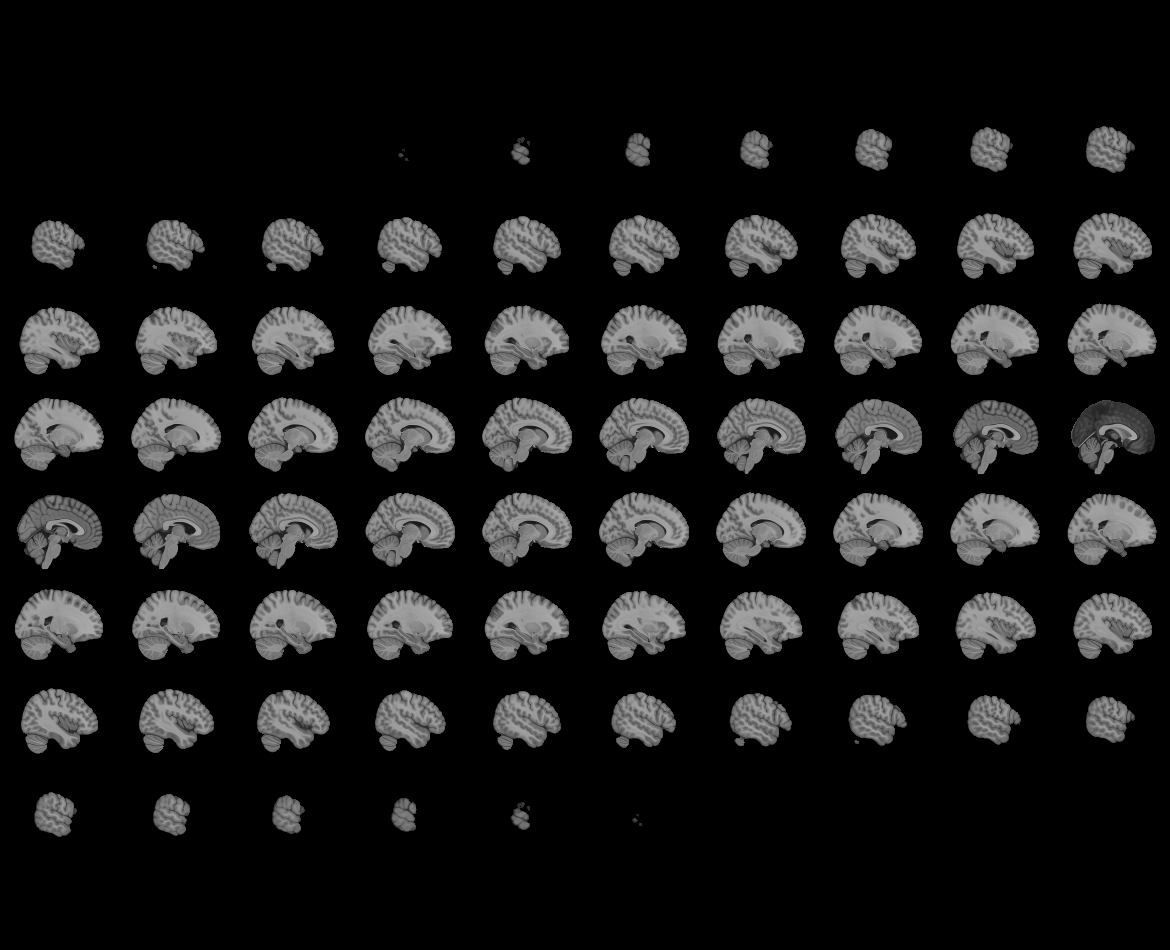
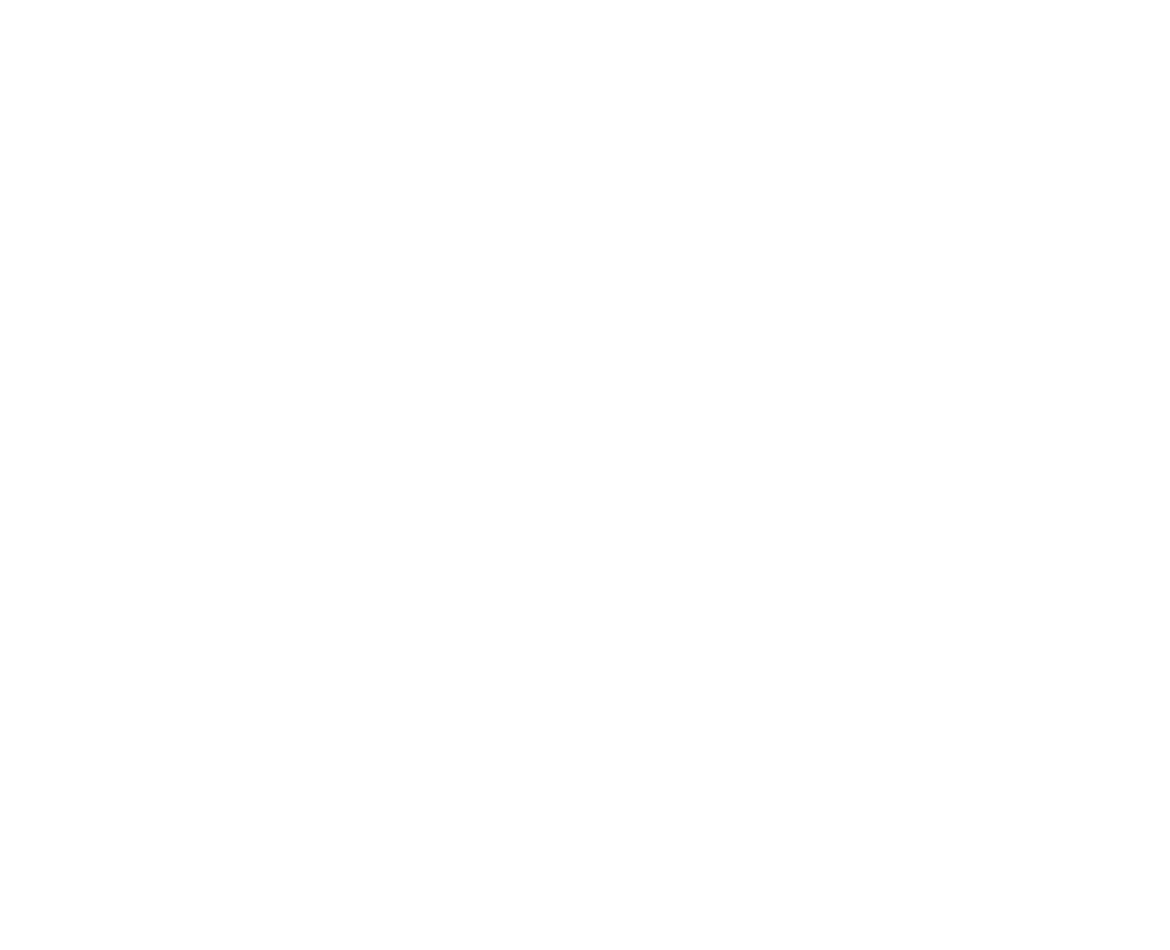

In [28]:
# treshold image based on values
from nilearn.image import binarize_img
clean_img = image.clean_img(ts, ensure_finite=True)
print(clean_img.shape)
fdata = ts.get_fdata()
print(np.unique(fdata,return_counts=True))
print(min(fdata.flatten()), max(fdata.flatten()))
#plotting.view_img(image.mean_img(clean_img), colorbar=True)


# Sphere masker

In [22]:
from nilearn.maskers import NiftiSpheresMasker
from nilearn.maskers import NiftiSpheresMasker

from nilearn import plotting

# Define the coordinates of the spheres
sphere_coords = [
    (54, -28, 26),
    (-20, -26, -14),
    (-2, 20, 32),
    (-8, 44, 28),
    (-6, -26, 46),
]

# Create the NiftiSphereMasker
sphere_masker = NiftiSpheresMasker(sphere_coords,mask_img=voxel_masker.mask_img_,  radius=6).fit(func_asl)

# Apply the masker to the functional images

masked_data = sphere_masker.transform(func_asl)
print(masked_data.shape)
# Plot the masked data on a glass brain
#plotting.plot_glass_brain(sphere_masker.inverse_transform(masked_data), title='Sphere Masker')

#report = sphere_masker.generate_report()
#r#eport
# Generate the masker report and save it as HTML
#report = sphere_masker.generate_report('all')
#report.save_as_html('sphere-masker-report.html')


(60, 5)


AttributeError: 'NiftiSpheresMasker' object has no attribute 'plotting_roi'

In [21]:
from nilearn import datasets, plotting
dataset = datasets.fetch_development_fmri(n_subjects=1)

# print basic information on the dataset
print(f"First subject functional nifti image (4D) is at: {dataset.func[0]}")
dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
    "Posterior Cingulate Cortex",
    "Left Temporoparietal junction",
    "Right Temporoparietal junction",
    "Medial prefrontal cortex",
]
from nilearn.maskers import NiftiSpheresMasker

masker = NiftiSpheresMasker(
    dmn_coords,
    radius=8,
    detrend=True,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    low_pass=0.1,
    high_pass=0.01,
    t_r=2,
    memory="nilearn_cache",
    memory_level=1,
    verbose=2,
    clean__butterworth__padtype="even",  # kwarg to modify Butterworth filter
)

# Additionally, we pass confound information to ensure our extracted
# signal is cleaned from confounds.

func_filename = dataset.func[0]
confounds_filename = dataset.confounds[0]

time_series = masker.fit_transform(
    func_filename, confounds=[confounds_filename]
)
report = masker.generate_report()
report

First subject functional nifti image (4D) is at: /home/dsutterlin/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('/home/dsutterlin/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'allow_overlap': False,
  'clean_kwargs': {'butterworth__padtype': 'even'},
  'detrend': True,
  'dtype': None,
  'high_pass': 0.01,
  'high_variance_confounds': False,
  'low_pass': 0.1,
  'mask_img': None,
  'radius': 8,
  'seeds': [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)],
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  't_r': 2}, confounds=[ '/home/dsutterlin/nilearn_data/development_fmri/development_fmri/sub-pixar1

AttributeError: 'NiftiSpheresMasker' object has no attribute 'generate_report'

In [33]:
from nilearn.image import  mean_img
from nilearn.maskers import NiftiMasker
from nilearn.datasets import load_mni152_brain_mask
from nilearn.image import binarize_img
from nilearn.image import clean_img

import numpy as np
p_data = r'home/dsutterlin/projects/test_data/ASL_RS_hypnosis/CBF_4D_normalized/APM_15_H2'
test_img = nib.load(os.path.join(test_data, 'APM_15_H2', 'wcbf_0_srASL_4D_during_4D.nii'))
#mask_img= nib.load(os.path.join(test_data, 'APM_15_H2', 'meanCBF_0_srASL_4D_during.nii'))
print(clean_img(nib.load('all_cond_mean_img.nii.gz')).shape)
mask_img = load_mni152_brain_mask(resolution=2)
print(mask_img.affine)
print(mask_img.shape)
resamp_mni = binarize_img(image.resample_to_img(mask_img, 'all_cond_mean_img.nii.gz'))
print(resamp_mni.affine)
print(resamp_mni.shape)
print(np.unique(resamp_mni.get_fdata(), return_counts=True))
#mean img
print(np.unique(nib.load('all_cond_mean_img.nii.gz').get_fdata(), return_counts=True))

voxel_masker = NiftiMasker(
    mask_img= resamp_mni,
    standardize="zscore_sample",
    mask_strategy = 'whole-brain-template',
    verbose=5,
)
voxel_masker.fit('all_cond_mean_img.nii.gz',)
report = voxel_masker.generate_report()

#oxel_masker = nib.load('1-voxelmask.nii.gz')
plotting.plot_roi('all_cond_mean_img.nii.gz',bg_img= resamp_mni, cmap='Paired')
report

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See https://nilearn.github.io/stable/manipulating_images/input_output.html.

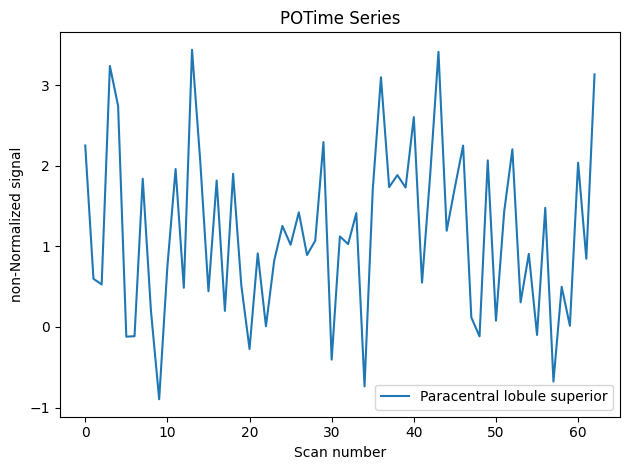

In [3]:
import pickle

p = r'/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis/debug/fitted_timeSeries.pkl'
lab = r'/home/dsutterlin/projects/resting_state_hypnosis/resting_state_hypnosis/debug/labels.pkl'
with open(p,  'rb') as f:
    data = pickle.load(f)
with open(lab, 'rb') as f:
    labels = pickle.load(f)

import matplotlib.pyplot as plt
plt.plot(data['pre_series'][0][43], label=labels[43])
plt.title("POTime Series")
plt.xlabel("Scan number")
plt.ylabel("non-Normalized signal")
plt.legend()
plt.tight_layout()



### Maps masker

# Data manip

In [ ]:
import nibabel as nib

pre_imgs = [nib.load(img) for img in pre_data]
resampled_series = pre_imgs



In [ ]:
from nilearn.image import concat_imgs, mean_img, resample_to_img
from nilearn.plotting import plot_epi, plot_roi, plot_stat_map
from nilearn.maskers import NiftiMasker
def check_masker_fit(data, masker):
    # print basic information on the dataset
    print("First functional nifti image (4D) is located " f"at: {data}")

    filename = data
    mean_im = mean_img(filename)
    plot_epi(mean_im, title="Mean EPI image")

    masker.fit(data)
    print("Masker fit done, see html report!")
    report = masker.generate_report()
    #report.save_as_html("masker_report.html")

    # plot the mask
    plot_roi(masker.mask_img_, mean_im, title="Mask")
masker = NiftiMasker(standardize=True, detrend=True, verbose=5)
check_masker_fit(data.post_hyp[1],masker)


### 3D slice to show alignment and background


In [ ]:
from nilearn.image import resample_img, index_img
img = index_img(pre_data[0],1)
img = resample_img(img, target_affine =index_img(pre_data[0],1).affine , interpolation = 'nearest')
plot_roi(img, title = 'mask')
plot_epi(img, bg_img = mean_data_mask, title = 'mask')
print(img.shape)


## 1. checking affines from 4D nifti files

In [ ]:
import nibabel as nib
from nilearn.image import index_img
import numpy as np
#
#im = index_img(im, 0)
#print(im.shape, im.header.get_zooms(), im.get_fdata().max(), im.get_fdata().min(), im.affine)

def check_affines(im):
    compare = []
    for i in range(im.shape[-1]):
        aff = np.array(index_img(im, i).affine)
        compare.append(aff)
        if i > 0:
            if (aff == compare[i-1]).all() == False:
                print('Error, not same affines', i, aff, compare[i-1])
                break
def check_4D_affines(im):
    '''
    im : list of 4D images
    
    im is a list of 4D images
    check if all affines are the same
    for each subject
    '''
    compare = []
    for i in range(len(im)):
        if type(im[i]) == str:
            im[i] = nib.load(im[i])
            aff = np.array(nib.load(im[i]).affine)
        else:
            aff = np.array(im[i].affine)
        print(aff)
        compare.append(aff)
        if i > 0:
            if (aff == compare[i-1]).all() == False:
                print('Error, not same affines for all subjects', i, aff, compare[i-1])
                break 
    
def check_shape(images_list):
    compare = []
    for i in range(len(images_list)):
        sh = np.array(index_img(images_list, i).shape[-1])
        compare.append(sh)
        if i > 0:
            if (sh == compare[i-1]).all() == False:
                print('Error, not same shape for all subjects', i, sh, compare[i-1])
                break
    print('------------------')

check_shape(func_pre[1])
check_4D_affines(func_pre)




## 2. resampling affine and shapes

In [ ]:
from nilearn import plotting
from nilearn.image import mean_img

m_im = mean_img(func_pre)
print('mean affine', m_im.affine)
plot_roi(m_im, title = 'mask')
plotting.view_img(m_im, threshold=None)



 when target_affine = reference_affine, the shape of the resampled image is NOT the same as the reference image. Have to specify mask_strategy =  ref_img.shape[:-1]

In [ ]:
import nibabel as nib
mean_all = mean_img(func_post + func_pre)
print(mean_all.affine, mean_all.shape)
(mean_all.affine == nib.load(func_post[1]).affine).all()

#### Resampling to mean_img from all data

In [ ]:
from nilearn.image import resample_to_img
resampled = []
all_files = func_pre + func_post
ref_img = mean_all # with affine of first image used to fit mean_img
for i in range(len(all_files)):
    resampled.append(resample_to_img(all_files[i], ref_img, interpolation='continuous'))


In [ ]:
mean_resampled = mean_img(resampled)
mean_resampled.shape

#### Resampling to MNI space

In [ ]:
data_mask.shape

In [ ]:
mni_resampled = []
all_files = func_pre
ref_img = data_mask # with affine of first image used to fit mean_img
for i in range(len(all_files)):
    mni_resampled.append(resample_to_img(all_files[i], ref_img, interpolation='continuous'))
mean_mni = mean_img(mni_resampled)

### 2.1 Comparing resampled-to-img.affine VS resampled-to-mniMask

In [ ]:
mean_resampled = mean_img(resampled)    
plot_roi(mean_resampled, title = 'mean_resampled', colorbar=True)
plot_epi(mean_resampled, title = 'mean_resampled',colorbar=True)
plotting.view_img(mean_resampled, threshold=None)
plot_epi(mean_mni, title = 'mean resampled to mni mean mask',colorbar=True)
plot_roi(mean_mni, title = 'mean resampled to mni mean mask',colorbar=True)
plotting.view_img(mean_mni, threshold=None)

#### Resampling with masker

In [ ]:
from nilearn.maskers import NiftiMasker
from nilearn.image import resample_to_img
import nibabel as nib

ref_img = data_mask
all_files = pre_data[0]
resample_strategy = 'masker'
args = {}
resampled_series = None
if resample_strategy == 'masker':
    # using masker to resample all images to the same shape
    voxel_masker = NiftiMasker(target_affine= ref_img.affine,target_shape = ref_img.shape, t_r = 3, high_pass = 0.1, detrend = True,mask_strategy = 'background',mask_args = args, standardize='zscore_sample')
    voxel_masker.fit(all_files)
    masked_img = voxel_masker.transform(all_files)
    print('ref_img.shape :{}, masked image shape : {}, inverse transformed img shape {}'.format(ref_img.shape, masked_img.shape,voxel_masker.inverse_transform(masked_img).shape))  
    resampled_series = [voxel_masker.inverse_transform(im) for im in masked_img]

    print('ref_img.shape :{}, resampled imgages shapes {}'.format(ref_img.shape, [s.shape for s in resampled_series]))
    check_4D_affines(resampled_series)


### Computing an EPI mask

In [ ]:
from nilearn.maskers import NiftiMasker
from nilearn.plotting import plot_epi, plot_roi
from nilearn.masking import compute_epi_mask, compute_multi_epi_mask
multi_epi_mask = compute_multi_epi_mask(resampled_series, opening = 1, connected = True, exclude_zeros = True, 
                                       upper_cutoff = 0.95, lower_cutoff = 0.2)
plot_roi(multi_epi_mask, bg_img = m_im)

# fitting nifi masker on one subject to generate report
nm = NiftiMasker(mask_img = multi_epi_mask)
nm.fit(resampled_series[2])
nm.generate_report()

## 3. Maskers for resampled series

### NiftiMasker

In [ ]:
mean_resampled = mean_img(resampled)

Comparing mean resampled vs mean resampled to MNI

In [ ]:
from nilearn.image import concat_imgs
for img in [resampled, mni_resampled]:
    concat = mean_img(concat_imgs(img))
    print(concat.shape)
    plot_roi(concat, title = 'mask')
    v = plotting.view_img(concat, threshold=None)
    v

### A. Masker on resampled data, no mask_img on single-sub timeseries

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker
m = NiftiMasker(mask_strategy = 'whole-brain-template', t_r = 3, smoothing_fwhm=6).fit(resampled[0])
t = m.transform(resampled[0])
trans_mean_mask = m.inverse_transform(t)
plot_roi(mean_img(resampled[1]), title = 'mean data on mni background')
plot_roi(mean_img(trans_mean_mask), title = 'transfomed mean img')
plot_roi(m.mask_img_, title = 'computed mask')
m.generate_report()

In [ ]:
trans_mean_mask[0].affine == mni_resampled[0].affine

#### A.b with 'epi' strategy

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker
m = NiftiMasker(mask_strategy = 'epi', t_r = 3, smoothing_fwhm=6).fit(resampled[0])
t = m.transform(resampled[0])
trans_mean_mask = m.inverse_transform(t)
plot_roi(mean_img(trans_mean_mask), title = 'mean transformed imgs')
plot_roi(m.mask_img_, title = 'computed mask')
m.generate_report()

### B. Masker on MNI-resampled data, with mask_img on single-sub timeseries

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker

m = NiftiMasker(mask_strategy = 'whole-brain-template', t_r = 3, smoothing_fwhm=6).fit(mni_resampled[0])
t = m.transform(mni_resampled[0], confounds = data.confounds_pre_hyp + data.confounds_post_hyp)
trans_mean_mask = m.inverse_transform(t)
plot_roi(mean_img(trans_mean_mask), title = 'mean transformed imgs')
plot_roi(m.mask_img_, title = 'computed mask')
m.generate_report()

### C. Masker on MNI-resampled data, with binarized mean_data_mask(MNI) on single-sub timeseries

In [ ]:
from nilearn.image import binarize_img
bin_mni_mask = binarize_img(mean_data_mask)
plot_roi(bin_mni_mask, title = 'binarized mni mask')

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker

m = NiftiMasker(mask_img = bin_mni_mask, mask_strategy = 'whole-brain-template', t_r = 3, smoothing_fwhm=6).fit(mni_resampled[0])
t = m.transform(mni_resampled[0])
trans_mean_mask = m.inverse_transform(t)
plot_roi(mean_img(trans_mean_mask), title = 'mean transformed imgs')
plot_roi(m.mask_img_, title = 'computed mask')
m.generate_report()

### D. Masker on resampled data, with binarized mean_data_mask(MNI) on single-sub timeseries

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker

m = NiftiMasker(mask_img = bin_mni_mask, mask_strategy = 'whole-brain-template', t_r = 3, smoothing_fwhm=6).fit(resampled[0])
t = m.transform(resampled[0])
trans_mean_mask = m.inverse_transform(t)
plot_roi(mean_img(trans_mean_mask), title = 'mean transformed imgs')
plot_roi(m.mask_img_, title = 'computed mask')
m.generate_report()

### E. Comparing 'epi' vs 'background' strategies on  multisubjects resampled data

> 'epi' --> cuts a little the data, but removes out of brain ring 

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker

mnm = MultiNiftiMasker(mask_strategy = 'epi', t_r = 3, smoothing_fwhm=6).fit(resampled)
t = mnm.transform(resampled, confounds = data.confounds_pre_hyp + data.confounds_post_hyp)
trans_mean_mask = mnm.inverse_transform(t)
plot_roi(mean_img(resampled),bg_img = mean_all, title = 'mean imgs', colorbar=True)
plot_roi(mean_img(trans_mean_mask),bg_img = mean_all, title = 'mean transformed imgs', colorbar=True)
plot_roi(mnm.mask_img_,bg_img=mean_all, title = 'computed mask',  colorbar=True)


> 'background' --> keeps the data, but keeps out of brain ring

In [ ]:
from nilearn.maskers import MultiNiftiMasker, NiftiMasker

m = MultiNiftiMasker(mask_strategy = 'background',t_r = 3, smoothing_fwhm=6).fit(resampled)
t = m.transform(resampled, confounds = data.confounds_pre_hyp + data.confounds_post_hyp)
trans_mean_mask = m.inverse_transform(t)
plot_roi(mean_img(resampled),bg_img = mean_all, title = 'mean imgs', colorbar=True)
plot_roi(mean_img(trans_mean_mask),bg_img = mean_all, title = 'mean transformed imgs', colorbar=True)
plot_roi(m.mask_img_, title = 'computed mask',  colorbar=True)

#### Comparing masker.transform vs masker.transform_imgs : Appear to be the same at the 5D level!

In [ ]:
print(trans_[0].shape,transf_imgs[0].shape)
(trans_[0] == transf_imgs[0]).all()

#### Transforming single subject 4D data

## 4. Maps masker

In [ ]:
from nilearn.maskers import NiftiMapsMasker, MultiNiftiMapsMasker  

masker = NiftiMapsMasker(
            maps_img=atlas,mask_img = mnm.mask_img_,t_r=3,smoothing_fwhm=6,standardize="zscore_sample",verbose=5,resampling_target="data",)
masker.fit(resampled[0])

time_series = masker.transform(resampled[0], confounds=data.confounds_pre_hyp[0])
plot_roi(
    masker.mask_img_,bg_img = mean_img(atlas), title="Maps mask from multi-masker")

In [ ]:
from nilearn import plotting
from nilearn.image import index_img
from nilearn.plotting import find_xyz_cut_coords

# Showing region extraction results using 4D maps visualization tool
plotting.plot_prob_atlas(
    atlas,
    display_mode="z",
    cut_coords=1,
    view_type="contours",
    title="Regions extracted.",
)

In [ ]:
from nilearn.maskers import NiftiMapsMasker, MultiNiftiMapsMasker  

masker = NiftiMapsMasker(
            maps_img=atlas,
            mask_img = mean_data_mask,
            t_r=3,
            smoothing_fwhm=6,
            standardize="zscore_sample",
            verbose=5,
            resampling_target="mask",
        )
masker.fit(all_files[0])

time_series = masker.transform(resampled[0], confounds=data.confounds_pre_hyp[0])
plot_roi(
    masker.mask_img_,bg_img = mean_img(atlas), title="Maps mask from multi-masker")

In [ ]:
report = masker.generate_report(displayed_maps=[2, 6, 7, 16, 21, 30, 40,50,60])
report

In [ ]:
from nilearn.maskers import NiftiMapsMasker, MultiNiftiMapsMasker  

masker = NiftiMapsMasker(
            maps_img=atlas,
            t_r=3,
            smoothing_fwhm=6,
            standardize="zscore_sample",
            verbose=5,
            resampling_target="data",
        )
masker.fit(resampled[0])

time_series = masker.transform(resampled[0], confounds=data.confounds_pre_hyp[0])
plot_roi(
    masker.mask_img_,bg_img = mean_img(atlas), title="Maps mask from multi-masker")

In [ ]:
masker.generate_report()

## 5. labeled masker

### yeo17 atlas (labeled atlas vs maps)

In [ ]:
importlib.reload(func)

yeoatlas, atlas_labels,atlas_name, confounds = func.load_choose_atlas('yeo_17', bilat=True)


In [ ]:
plot_roi(mean_resampled, bg_img = resample_to_img(mean_resampled, yeoatlas))

In [ ]:
#check for matching labels/values
import numpy as np
print(atlas_labels, np.unique(yeoatlas.get_fdata(), return_counts=True))

In [ ]:
from nilearn.maskers import NiftiLabelsMasker, MultiNiftiLabelsMasker

lm = NiftiLabelsMasker(labels_img = yeoatlas, mask_img= bin_mni_mask, labels = atlas_labels,resampling_target = 'data', standardize = 'zscore_sample', verbose=0)
lm.fit(mni_resampled[1])
lm.generate_report()

In [ ]:
from nilearn import datasets

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'

from nilearn.maskers import NiftiMapsMasker, MultiNiftiMapsMasker  

masker = NiftiMapsMasker(
            maps_img=atlas_filename,
            standardize="zscore_sample",
            verbose=5,
            resampling_target="data",
        )
masker.fit(resampled[0])

time_series = masker.transform(resampled[0], confounds=data.confounds_pre_hyp[0])
#plot_roi(
    #masker.mask_img_,bg_img = mean_img(atlas), title="Maps mask from multi-masker")

In [ ]:
masker.generate_report(displayed_maps=[2, 6, 7,])


> MapsMasker with mask from MultiMasker ('epi' strategy)
--> not aligned with atlas!

In [ ]:
from nilearn.maskers import NiftiMapsMasker, MultiNiftiMapsMasker  

masker = MultiNiftiMapsMasker(
            maps_img=atlas,
            t_r=3,
            smoothing_fwhm=6,
            standardize="zscore_sample",
            verbose=5,
            resampling_target="data",
        )
masker.fit(resampled)
results['pre_series'] = [masker.transform(ts, confounds = cf) for ts, cf in zip(resampled, data.confounds_pre_hyp)]
inv = [masker.inverse_transform(ts) for ts in results['pre_series']]
plot_roi(
    masker.mask_img_,bg_img = mean_img(atlas), title="Maps mask from multi-masker"
)

In [ ]:
from nilearn.maskers import NiftiMapsMasker, MultiNiftiMapsMasker  

masker = MultiNiftiMapsMasker(
            maps_img=atlas,
            t_r=3,
            smoothing_fwhm=6,
            standardize="zscore_sample",
            verbose=5,
            resampling_target="data",
        )
masker.fit(mni_resampled)
results['pre_series'] = [masker.transform(ts, confounds = cf) for ts, cf in zip(mni_resampled, data.confounds_pre_hyp)]
inv = [masker.inverse_transform(ts) for ts in results['pre_series']]
plot_roi(
    masker.mask_img_,bg_img = mean_img(atlas), title="Maps mask from multi-masker")

In [ ]:
atlas.shape

In [ ]:
results['pre_series'][0].shape
inv[0].shape

In [ ]:
from nilearn.maskers import MultiNiftiMapsMasker   

multi_mapsmasker = MultiNiftiMapsMasker(
            maps_img=atlas,
            mask_img=voxel_masker.mask_img_,
            t_r=3,
            smoothing_fwhm=6,
            standardize="zscore_sample",
            verbose=5,
            resampling_target="data",
        )
multi_mapsmasker.fit(resampled_series)
print(multi_mapsmasker.mask_img_.shape, multi_mapsmasker.transform(resampled_series[0]).shape)
samp_multimaps0 = multi_mapsmasker.transform(resampled_series[0])
plot_roi(
    masker.mask_img_,bg_img = m_im, title="Maps mask from multi-masker"
)

In [ ]:
multi_mapsmasker.generate_report()

#### Comparing single img transform from MultiMaps vs maps : gives same output 

In [ ]:
print(samp_maps0.shape, samp_multimaps0.shape)
(samp_maps0 == samp_multimaps0).all()

In [ ]:
from nilearn.plotting import plot_prob_atlas

plot_prob_atlas(atlas, bg_img = voxel_masker.mask_img_)

### Sphere-ROI correlation to plot

### test on all data

In [ ]:
print(results["pre_series"][0].shape, results["seed_pre_series"][0].shape)
[seed_masker.transform(ts) for ts in resampled_series]


In [ ]:
results["voxel_pre_series"] = [mnm.transform(ts) for ts in resampled_series]

In [57]:
from nilearn import plotting
from nilearn.maskers import NiftiSpheresMasker

sphere_coord = [(54, -28, 26)]
seed_masker = NiftiSpheresMasker(
    sphere_coord, radius=8, standardize="zscore_sample"
)

seed_masker.fit(func_asl)

results["seed_pre_series"] = [seed_masker.transform(ts) for ts in resampled_series]
results["seed_to_pre_correlations"] = [
        (np.dot(brain_time_series.T, seed_time_series) / seed_time_series.shape[0])
        for brain_time_series, seed_time_series in zip(
            results["voxel_pre_series"], results["seed_pre_series"]
        )
    ]    

results["mean_seed_pre_connectome"] = np.mean(
        results["seed_to_pre_correlations"], axis=0
    )

    

NameError: name 'resampled_series' is not defined

In [ ]:
results["mean_seed_pre_connectome"].T.shape


In [ ]:
from nilearn.datasets import fetch_atlas_yeo_2011

# Fetch the Yeo-17 atlas
atlas = fetch_atlas_yeo_2011()

# Access the region labels
region_labels = atlas['labels']

# Print the region labels
for label in region_labels:
    print(label)

In [ ]:

seed_to_voxel_correlations_img = mnm.inverse_transform(
    results["mean_seed_pre_connectome"].T
)

display = plotting.plot_stat_map(
    seed_to_voxel_correlations_img,
    threshold=0.5,
    vmax=1,
    cut_coords=sphere_coord[0],
    title="Seed-to-voxel correlation (OP seed)",
)
display.add_markers(
    marker_coords=sphere_coord[0], marker_color="g", marker_size=300
)

In [ ]:
from nilearn.datasets import fetch_miyawaki2008

dataset = fetch_miyawaki2008()

# training data starts after the first 12 files
fmri_random_runs_filenames = dataset.func[12:]
stimuli_random_runs_filenames = dataset.label[12:]

# training data starts after the first 12 files
fmri_random_runs_filenames = dataset.func[12:]
stimuli_random_runs_filenames = dataset.label[12:]

import numpy as np

from nilearn.maskers import MultiNiftiMasker

masker = MultiNiftiMasker(
    mask_img=dataset.mask, detrend=True, standardize="zscore_sample"
)
masker.fit()
fmri_data = masker.transform(fmri_random_runs_filenames)

# shape of the binary (i.e. black and wihte values) image in pixels
stimulus_shape = (10, 10)

# We load the visual stimuli from csv files
stimuli = []
for stimulus_run in stimuli_random_runs_filenames:
    stimuli.append(
        np.reshape(
            np.loadtxt(stimulus_run, dtype=int, delimiter=","),
            (-1,) + stimulus_shape,
            order="F",
        )
    )
    

In [5]:
import numpy as np
table = np.array([[1, 10,  1, 11],
                  [2, 21,  2, 20],
                  [3, 30, 3, 31],
                  [4, 41, 4, 40]])
table_0 = table[table>10]
print(table_0)
print(table[table<10 & table%2!=0])

[11 21 20 30 31 41 40]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()